In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('./gold.csv')
df.head()

,year,price
0,1965,72
1,1966,84
2,1967,103
3,1968,162
4,1969,176


1993.5 10088.120689655172
Slope =  676.7278907379495
Intercept =  -1338968.929496447
Linear Regression Equation = 676.7278907379495x + -1338968.929496447


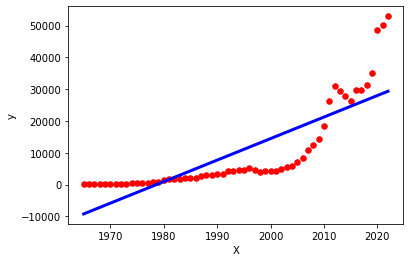

Prediction for year 2025:
31405.04924790049
Prediction for 1 gram = 3140.504924790049


In [22]:
x = df['year']
y = df['price']
n = np.size(x)
x_bar = np.mean(x)
y_bar = np.mean(y)
print(x_bar, y_bar)
nr = np.sum(x*y) - (n * x_bar * y_bar)
dr = np.sum(x*x) - (n * x_bar * x_bar)

slope = nr/dr
c = y_bar - slope * x_bar
print("Slope = ", slope)
print("Intercept = ", c)
print("Linear Regression Equation = {}x + {}".format(slope, c))

plt.scatter(x,y, color='r', marker='o', s = 30)
y_pred = slope * x + c
plt.plot(x, y_pred, color='b', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print("Prediction for year 2025:")
y_2025 = slope * 2025 + c
print(y_2025)
print(f"Prediction for 1 gram = {y_2025/10}")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
df = np.array(df)
years = df[:,0].reshape(-1,1)
prices = df[:,1]

model = LinearRegression()
model.fit(years, prices)

slope = model.coef_[0]
intercept = model.intercept_

predict_2025 = model.predict([[2025]])[0]

print("Linear Regression Model:")
print(f"Gold Price = {slope} * year + {intercept}")
print(f"Gold Price in 2025 = {predict_2025}")
print(f"Prediction for 1 gram = {predict_2025/10}")

Linear Regression Model:
Gold Price = 676.7278907379495 * year + -1338968.929496447
Gold Price in 2025 = 31405.04924790049
Prediction for 1 gram = 3140.504924790049


In [25]:
prediction = model.predict(years)
mse = mean_squared_error(prices, prediction)
rmse = np.sqrt(mse)
print(f"Mean Squared Error = {mse}")
print(f"Root Mean Squared Error = {rmse}")

Mean Squared Error = 62776522.622688085
Root Mean Squared Error = 7923.163675116657


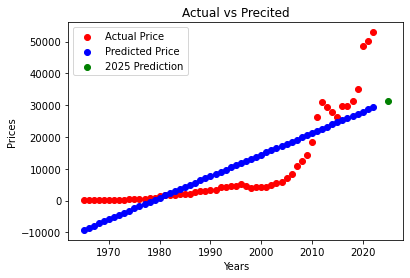

In [26]:
plt.scatter(years, prices, color='r', label='Actual Price')
plt.scatter(years, prediction, color='b', label='Predicted Price')
plt.scatter([[2025]],predict_2025, color='g', label='2025 Prediction')
plt.title('Actual vs Precited')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [29]:
df2 = pd.read_csv('./goldandsilver.csv')
df2.head()

,year,goldprice,silverprice
0,1981,1800,2715
1,1982,1645,2720
2,1983,1800,3105
3,1984,1970,3570
4,1985,2130,3955


2001.5 13779.52380952381 20435.261904761905
Slope for Gold =  1050.4516651811036
Slope for Silver =  1387.5249169435217
Intercept =  -4886265.867217676
Linear Regression Equation = 1050.4516651811036x1 +1387.5249169435217x2 + -4886265.867217676


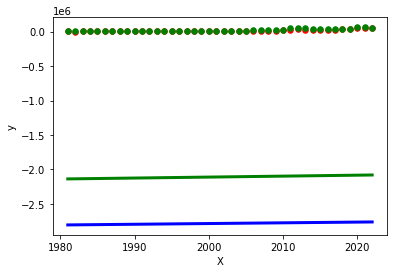

Prediction for year 2025:
-2759101.245225941
Prediction for 1 gram = -275910.1245225941


In [53]:
x = df2['year']
y_gold = df2['goldprice']
y_silver = df2['silverprice']
n = np.size(x)
x_bar = np.mean(x)
y_gold_bar = np.mean(y_gold)
y_silver_bar = np.mean(y_silver)
print(x_bar, y_gold_bar, y_silver_bar)
nr_gold = np.sum(x*y_gold) - (n * x_bar * y_gold_bar)
nr_silver = np.sum(x*y_silver) - (n * x_bar * y_silver_bar)
dr = np.sum(x*x) - (n * x_bar * x_bar)

slope_gold = nr_gold/dr
slope_silver = nr_silver/dr
c = y_gold_bar - slope_gold * x_bar - y_silver_bar - slope_silver * x_bar
c_silver = y_silver_bar - slope_silver * x_bar
print("Slope for Gold = ", slope_gold)
print("Slope for Silver = ", slope_silver)
print("Intercept = ", c)
print("Linear Regression Equation = {}x1 +{}x2 + {}".format(slope_gold, slope_silver, c))

plt.scatter(x,y_gold, color='r', marker='o', s = 30)
plt.scatter(x,y_silver, color='g', marker='o', s = 30)
y_pred_gold = slope_gold * x + c
y_pred_silver = slope_silver * x + c
plt.plot(x, y_pred_gold, color='b', linewidth=3)
plt.plot(x, y_pred_silver, color='g', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print("Prediction for year 2025:")
y_2025 = slope_gold * 2025 + c
print(y_2025)
print(f"Prediction for 1 gram = {y_2025/10}")

In [36]:
data = pd.read_csv('goldandsilver.csv')
X = data['year'].values.reshape(-1, 1)
y_gold = data['goldprice'].values
y_silver = data['silverprice'].values

reg_gold = LinearRegression()
reg_gold.fit(X, y_gold)

reg_silver = LinearRegression()
reg_silver.fit(X, y_silver)

sklearn_coeff_gold = reg_gold.coef_[0]
sklearn_intercept_gold = reg_gold.intercept_

sklearn_coeff_silver = reg_silver.coef_[0]
sklearn_intercept_silver = reg_silver.intercept_

In [54]:
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
custom_coeff_gold = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_gold)
custom_coeff_silver = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_silver)

year_2024 = np.array([[2024]])
predicted_gold_price_sklearn = reg_gold.predict(year_2024)[0]
predicted_silver_price_sklearn = reg_silver.predict(year_2024)[0]

predicted_gold_price_custom = custom_coeff_gold[0] + custom_coeff_gold[1] * 2024
predicted_silver_price_custom = custom_coeff_silver[0] + custom_coeff_silver[1] * 2024

y_gold_pred_sklearn = reg_gold.predict(X)
y_silver_pred_sklearn = reg_silver.predict(X)

mse_gold_sklearn = mean_squared_error(y_gold, y_gold_pred_sklearn)
rmse_gold_sklearn = np.sqrt(mse_gold_sklearn)

mse_silver_sklearn = mean_squared_error(y_silver, y_silver_pred_sklearn)
rmse_silver_sklearn = np.sqrt(mse_silver_sklearn)

print("Gold Price Coefficients :", sklearn_intercept_gold, sklearn_coeff_gold)
print("Silver Price Coefficients :", sklearn_intercept_silver, sklearn_coeff_silver)

print("Predicted Gold Price per gram in 2024 :", predicted_gold_price_sklearn/10)
print("Predicted Silver Price per gram in 2024 :", predicted_silver_price_sklearn/1000)

print("MSE Gold :", mse_gold_sklearn)
print("RMSE Gold :", rmse_gold_sklearn)

print("MSE Silver :", mse_silver_sklearn)
print("RMSE Silver :", rmse_silver_sklearn)

Gold Price Coefficients : -2088699.4840504555 1050.4516651811039
Silver Price Coefficients : -2756695.8593576956 1387.5249169435212
Predicted Gold Price per gram in 2024 : 3741.4686276098714
Predicted Silver Price per gram in 2024 : 51.65457253599167
MSE Gold : 52373373.849650644
RMSE Gold : 7236.945063329598
MSE Silver : 94823571.4622161
RMSE Silver : 9737.739545819455


2001.5 13779.52380952381 20435.261904761905
Slope for Gold =  1050.4516651811036
Slope for Silver =  1387.5249169435217
Intercept =  -4886265.867217676
Linear Regression Equation = 1050.4516651811036x1 +1387.5249169435217x2 + -4845395.3434081515


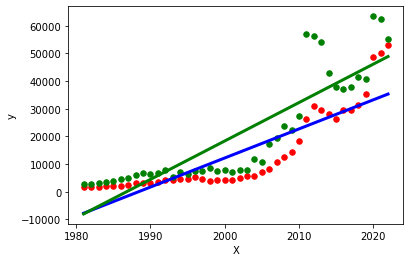

Prediction for year 2025:
38465.137941279914
Prediction for 1 gram = 3846.5137941279913


In [40]:
# this block of code is just for checking what happens if i take 2 different intercepts
x = df2['year']
y_gold = df2['goldprice']
y_silver = df2['silverprice']
n = np.size(x)
x_bar = np.mean(x)
y_gold_bar = np.mean(y_gold)
y_silver_bar = np.mean(y_silver)
print(x_bar, y_gold_bar, y_silver_bar)
nr_gold = np.sum(x*y_gold) - (n * x_bar * y_gold_bar)
nr_silver = np.sum(x*y_silver) - (n * x_bar * y_silver_bar)
dr = np.sum(x*x) - (n * x_bar * x_bar)

slope_gold = nr_gold/dr
slope_silver = nr_silver/dr
c_gold = y_gold_bar - slope_gold * x_bar
c_silver = y_silver_bar - slope_silver * x_bar
print("Slope for Gold = ", slope_gold)
print("Slope for Silver = ", slope_silver)
print("Intercept = ", c)
print("Linear Regression Equation = {}x1 +{}x2 + {}".format(slope_gold, slope_silver, c_gold+c_silver))

plt.scatter(x,y_gold, color='r', marker='o', s = 30)
plt.scatter(x,y_silver, color='g', marker='o', s = 30)
y_pred_gold = slope_gold * x + c_gold
y_pred_silver = slope_silver * x + c_silver
plt.plot(x, y_pred_gold, color='b', linewidth=3)
plt.plot(x, y_pred_silver, color='g', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print("Prediction for year 2025:")
y_2025 = slope_gold * 2025 + c_gold
print(y_2025)
print(f"Prediction for 1 gram = {y_2025/10}")